# Deep Packet Models Evaluation

## Import Libraries

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from ml.utils import load_application_classification_cnn_model, load_traffic_classification_cnn_model, normalise_cm
from ml.metrics import confusion_matrix, get_classification_report
from utils import ID_TO_APP, ID_TO_TRAFFIC

## Configuration

In [2]:
# plot dpi
mpl.rcParams['figure.dpi'] = 300

# model path
application_classification_cnn_model_path = 'model/application_classification.cnn.model'
traffic_classification_cnn_model_path = 'model/traffic_classification.cnn.model'

# test data path
application_classification_test_data_path = 'train_test_data/application_classification/test.parquet'
traffic_classification_test_data_path = 'train_test_data/traffic_classification/test.parquet'

## Load Model

In [3]:
application_classification_cnn = load_application_classification_cnn_model(application_classification_cnn_model_path,
                                                                           gpu=True)
traffic_classification_cnn = load_traffic_classification_cnn_model(traffic_classification_cnn_model_path, gpu=True)

## Performance

In [4]:
def plot_confusion_matrix(cm, labels):
    normalised_cm = normalise_cm(cm)
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(
        data=normalised_cm, cmap='YlGnBu',
        xticklabels=labels, yticklabels=labels,
        annot=True, ax=ax, fmt='.2f'
    )
    ax.set_xlabel('Predict labels')
    ax.set_ylabel('True labels')
    fig.show()

### Application Classification

#### CNN

In [5]:
app_cnn_cm = confusion_matrix(
    data_path=application_classification_test_data_path,
    model=application_classification_cnn,
    num_class=len(ID_TO_APP)
)

Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

Using custom data configuration test.parquet-0ac1aea0bafad699


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset parquet downloaded and prepared to .cache/huggingface/datasets/parquet/test.parquet-0ac1aea0bafad699/0.0.0/1638526fd0e8d960534e2155dc54fdff8dce73851f21f031d2fb9c2cf757c121. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

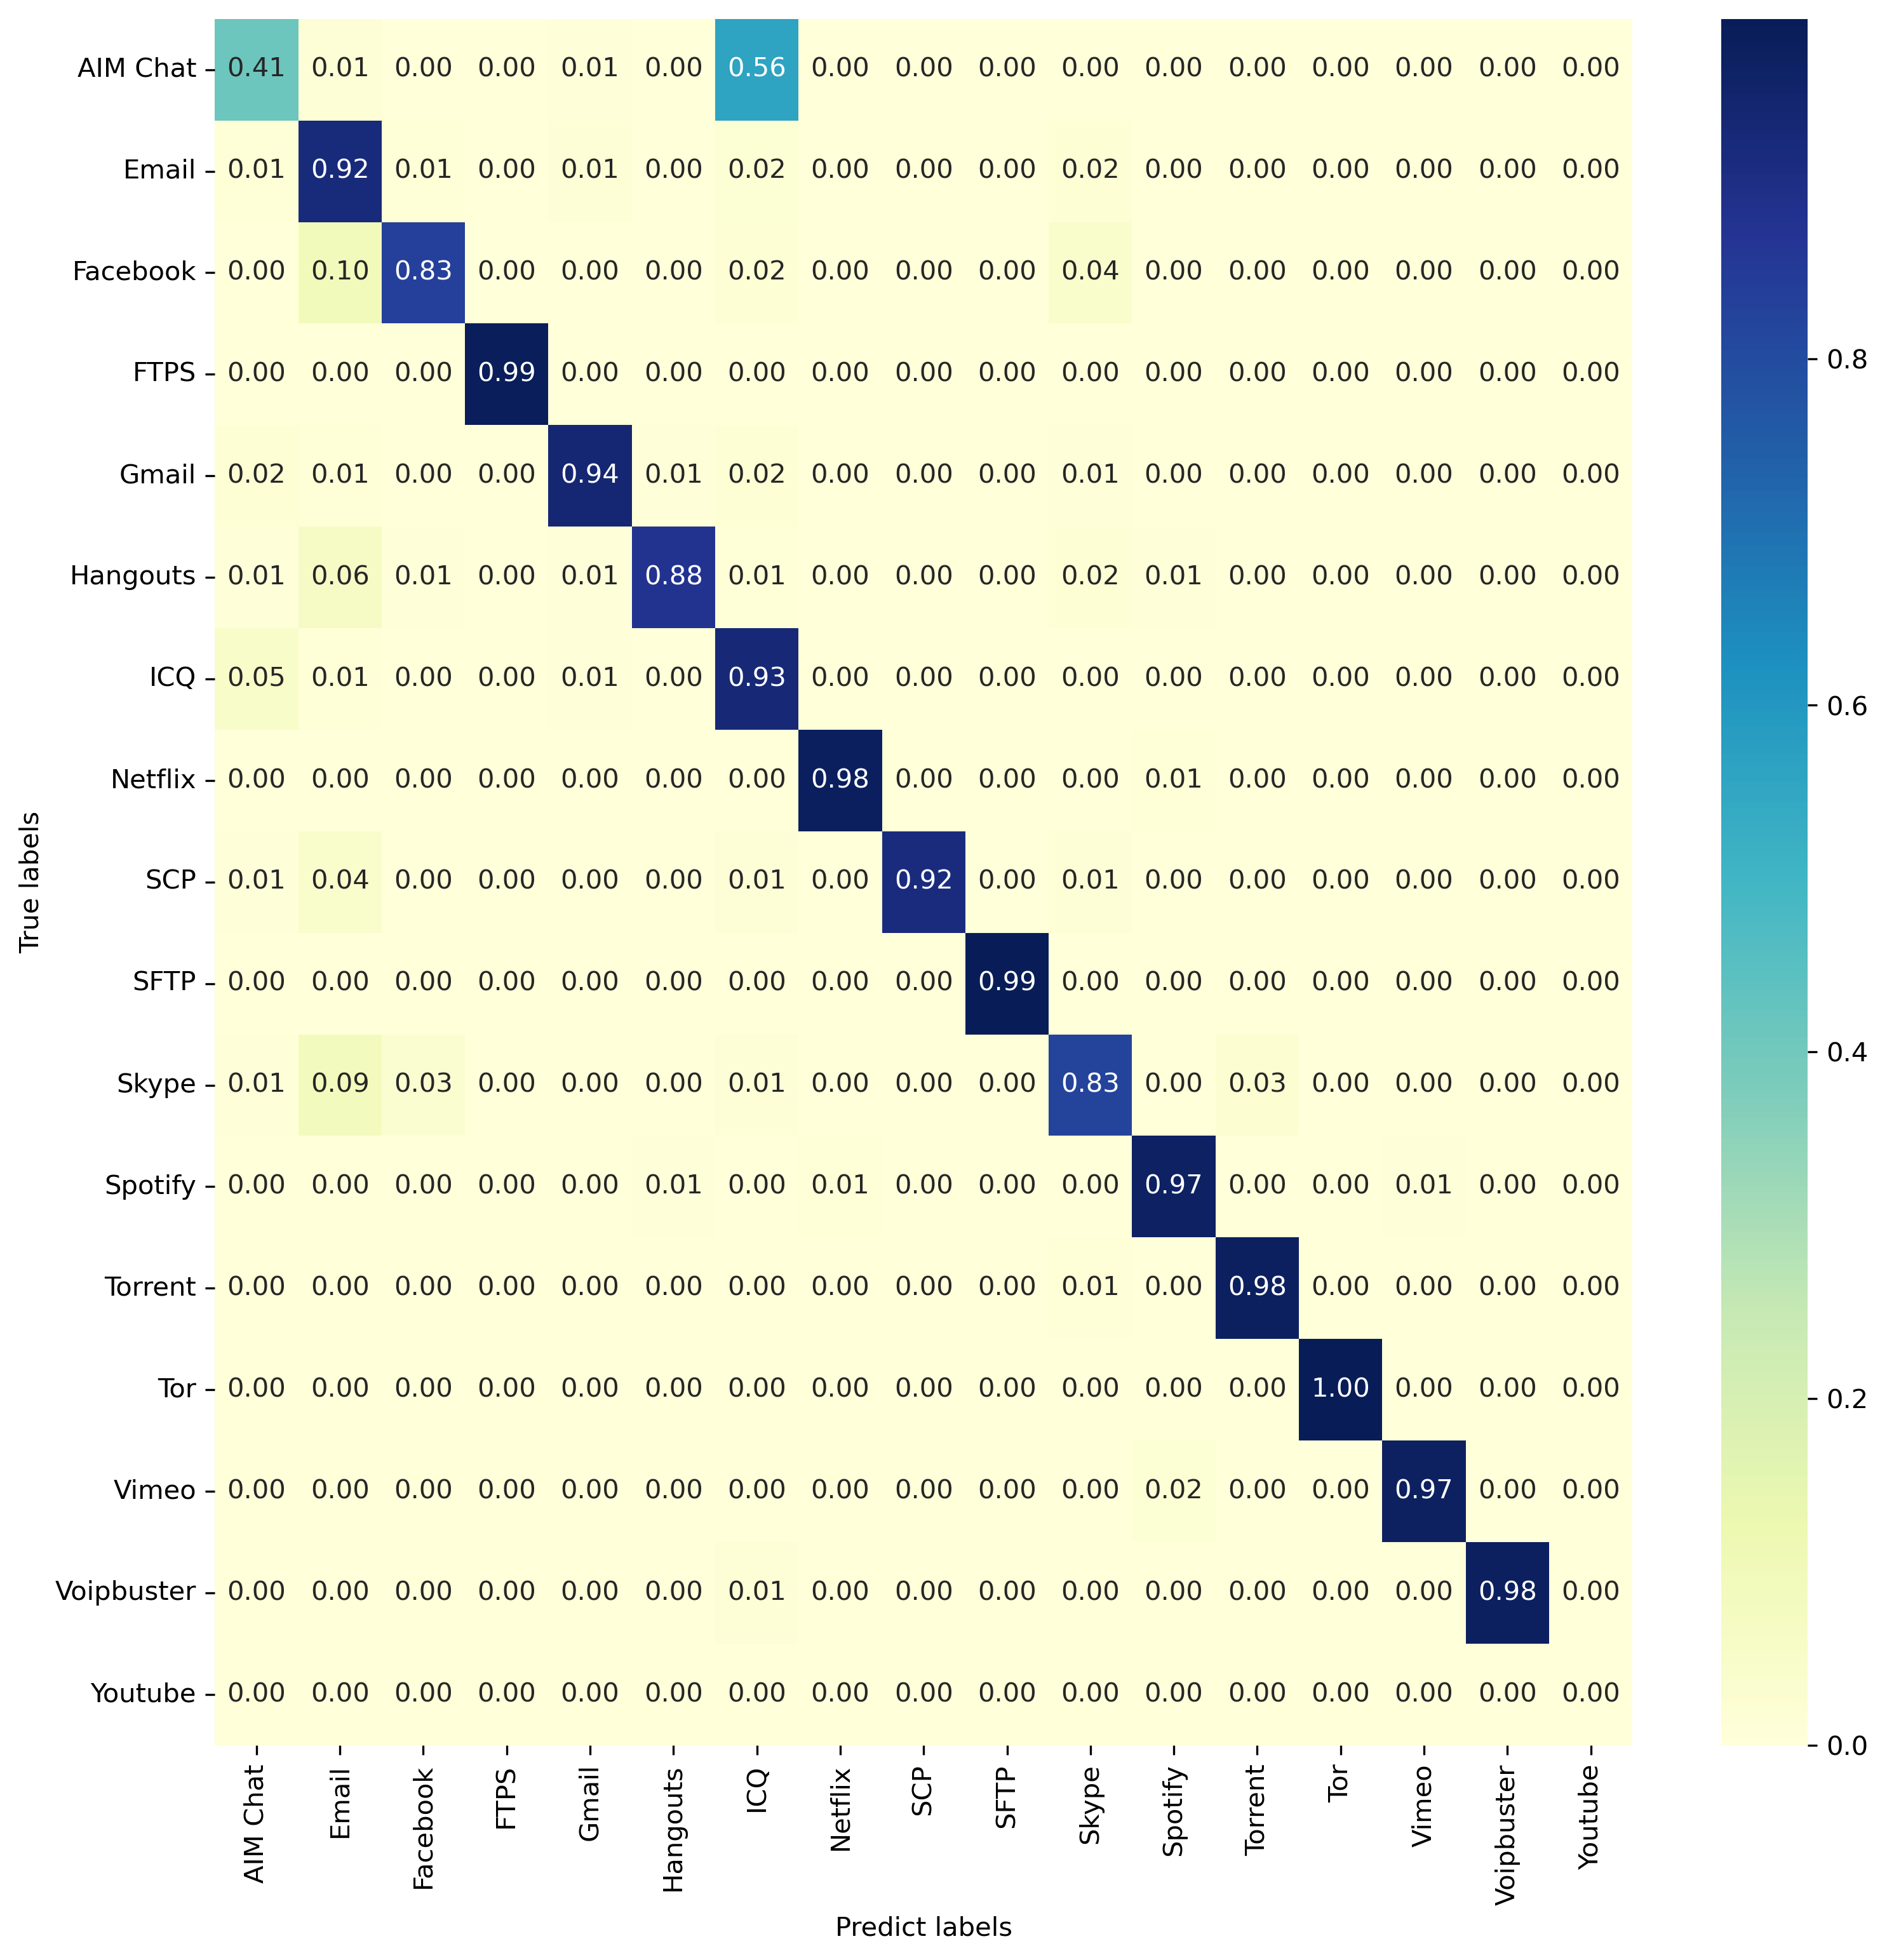

In [6]:
app_labels = []
for i in sorted(list(ID_TO_APP.keys())):
    app_labels.append(ID_TO_APP[i])
plot_confusion_matrix(app_cnn_cm, app_labels)

In [7]:
get_classification_report(app_cnn_cm, app_labels)

Deep-Packet/ml/metrics.py:42: RuntimeWarning: invalid value encountered in double_scalars
  return tp / tp_fp
Deep-Packet/ml/metrics.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return tp / p


,label,precision,recall
0,AIM Chat,0.023790,0.409794
1,Email,0.066854,0.923088
2,Facebook,0.937929,0.833089
3,FTPS,0.999483,0.991469
4,Gmail,0.174052,0.938134
5,Hangouts,0.997581,0.880204
6,ICQ,0.020441,0.930894
7,Netflix,0.972009,0.981194
8,SCP,0.952095,0.915645
9,SFTP,0.976796,0.992211


### Traffic Classification

#### CNN

In [ ]:
traffic_cnn_cm = confusion_matrix(
    data_path=traffic_classification_test_data_path,
    model=traffic_classification_cnn,
    num_class=len(ID_TO_TRAFFIC)
)


Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

Using custom data configuration test.parquet-0bcbb12c8de4e318


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset parquet downloaded and prepared to .cache/huggingface/datasets/parquet/test.parquet-0bcbb12c8de4e318/0.0.0/1638526fd0e8d960534e2155dc54fdff8dce73851f21f031d2fb9c2cf757c121. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
traffic_labels = []
for i in sorted(list(ID_TO_TRAFFIC.keys())):
    traffic_labels.append(ID_TO_TRAFFIC[i])

plot_confusion_matrix(traffic_cnn_cm, traffic_labels)

In [ ]:
get_classification_report(traffic_cnn_cm, traffic_labels)
